In [34]:
!pip install -q -U pymysql sqlalchemy

In [47]:
import os
import sys
import time
import datetime
import numpy as np
import pandas as pd
import pathlib
import getpass
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt
import matplotlib as ptl
import pymysql

In [41]:
import geoplot.crs as gcrs
import contextily as ctx
from cartopy import crs as ccrs

In [35]:
mapassp = gpd.read_file("C://Users//vanes//OneDrive//Área de trabalho//arquivos bd//geodata-br//geojson//geojs-35-mun.json")
mapassp = mapassp[['id','name', "geometry"]]
mapassp

,id,name,geometry
0,3500105,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4..."
1,3500204,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2..."
2,3500303,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9..."
3,3500402,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8..."
4,3500501,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4..."
...,...,...,...
640,3557006,Votorantim,"POLYGON ((-47.37268 -23.51783, -47.37047 -23.5..."
641,3557105,Votuporanga,"POLYGON ((-50.02073 -20.33347, -50.01275 -20.3..."
642,3557154,Zacarias,"POLYGON ((-49.99521 -21.03253, -49.98434 -21.0..."
643,3557204,Chavantes,"POLYGON ((-49.68539 -22.94866, -49.68396 -22.9..."


In [36]:
sp_nse = gpd.read_file("C://Users//vanes//OneDrive//Área de trabalho//arquivos bd//escola_nse.csv")

#sp_nse = gpd.read_file("C://Users//vanes//OneDrive//Área de trabalho//arquivos bd//escola_nse.csv")

sp_nse = sp_nse[['id_municipio','nivel_socio_economico']]
sp_nse["nivel_socio_economico"] = pd.to_numeric(sp_nse["nivel_socio_economico"])

sp_nse.fillna(0, inplace = True)
sp_nse.rename(columns={"id_municipio": "id"}, inplace = 1)

sp_nse=sp_nse.groupby("id").mean()

sp_nse = mapassp.join(sp_nse, on="id", how="left")
sp_nse

,id,name,geometry,nivel_socio_economico
0,3500105,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...",4.000000
1,3500204,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...",4.190000
2,3500303,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...",5.119091
3,3500402,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...",5.600000
4,3500501,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...",3.940000
...,...,...,...,...
640,3557006,Votorantim,"POLYGON ((-47.37268 -23.51783, -47.37047 -23.5...",4.268462
641,3557105,Votuporanga,"POLYGON ((-50.02073 -20.33347, -50.01275 -20.3...",4.268889
642,3557154,Zacarias,"POLYGON ((-49.99521 -21.03253, -49.98434 -21.0...",4.450000
643,3557204,Chavantes,"POLYGON ((-49.68539 -22.94866, -49.68396 -22.9...",5.020000


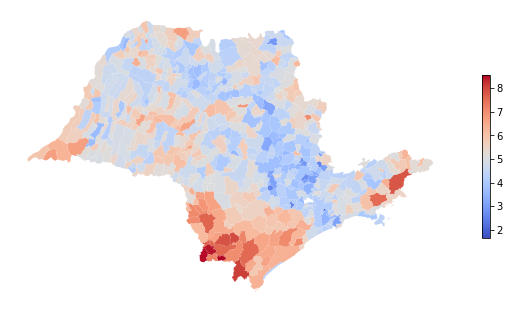

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
sp_nse.plot(ax=ax, column='nivel_socio_economico', cmap='coolwarm', legend=True, legend_kwds={'shrink': 0.3})
ax.axis('off');